In [2]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading data
data=pd.read_csv("C:/Users/kavan/Downloads/telecom_data.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#converting totalcharhes to integer
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= 'coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [5]:
#dropping unwanted coloums 
if'customerID' in data.columns:
    data.drop('customerID', axis=1,inplace=True)

In [6]:
#using label encoder
label_encoders={}
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le=LabelEncoder()
    data[column]= le.fit_transform(data[column])
    label_encoders[column]= le

In [7]:
#defining feature (x) and target (y)
x = data.drop('Churn', axis=1)
y = data['Churn']

In [8]:
#training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [9]:
#numerical features scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#training LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [11]:
#prediction
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:,1]

In [12]:
#evaluating the model accuracy 
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.80


In [13]:
#report classification
print("classification Report:")
print(classification_report(y_test,y_pred))

classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



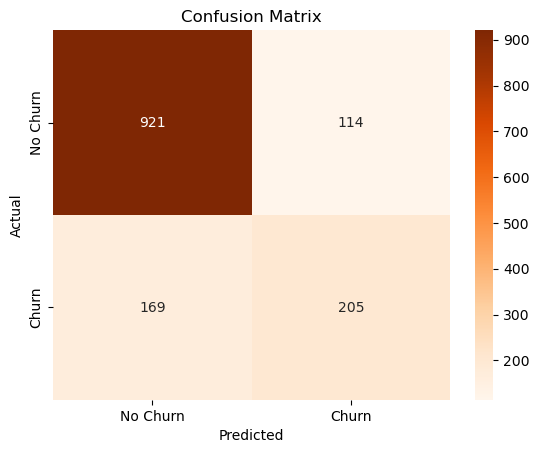

In [14]:
#plotting confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Oranges', xticklabels=['No Churn','Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [15]:
#roc score auc score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score:{roc_auc:.2f}")

ROC-AUC Score:0.84


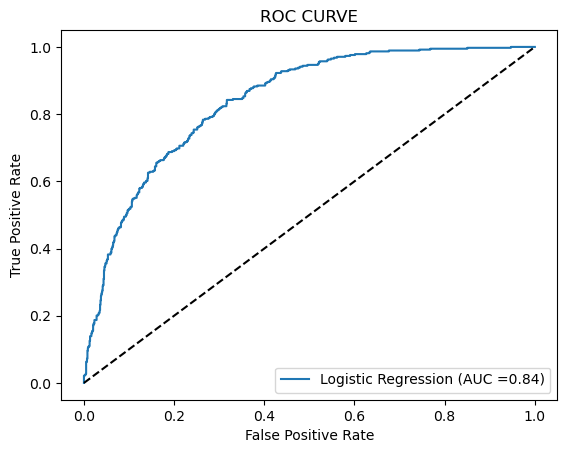

In [16]:
#plotting roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
plt.figure()
plt.plot(fpr,tpr, label=f"Logistic Regression (AUC ={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [17]:
#churn analysis
total_customers = len(data)
Churned_customers = data[data['Churn'] == 1]
churn_rate = len(Churned_customers)/ total_customers
arpu = data['MonthlyCharges'].mean()
revenue_loss = churn_rate* total_customers*arpu

In [18]:
#churn rate
print(f"Churn Rate: {churn_rate*100:.2f}%")
print(f"Average Revenue Per User (ARPU): ${arpu:.2f}")
print(f"Revenue Loss due to churn: ${revenue_loss:.2f}" )

Churn Rate: 26.54%
Average Revenue Per User (ARPU): $64.76
Revenue Loss due to churn: $121039.60


In [19]:
#insights 
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient':logreg.coef_[0]
})
coefficients['Impact']=np.where(coefficients['Coefficient'] > 0, 'Positive','Negative')
coefficients = coefficients.sort_values(by='Coefficient',ascending=False)



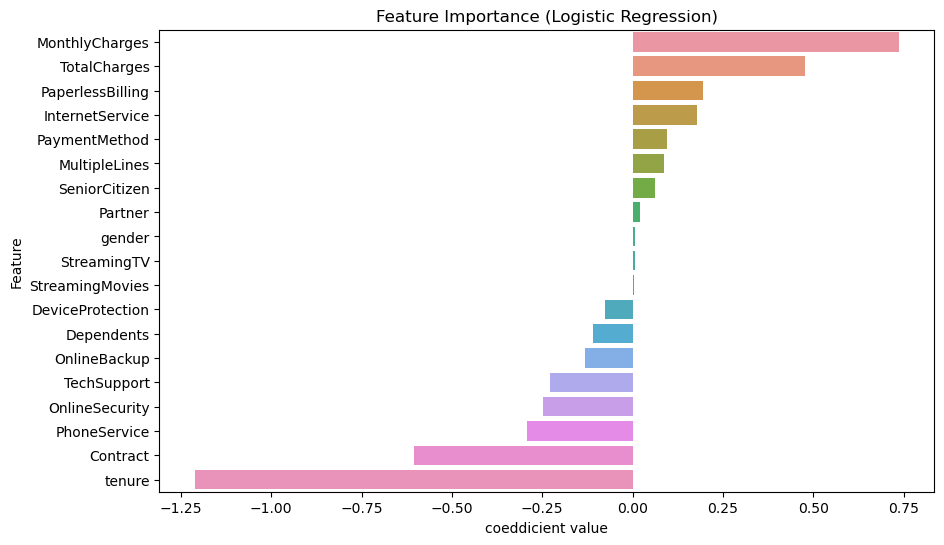

In [20]:
#plotting barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient',y='Feature' , data=coefficients)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('coeddicient value')
plt.ylabel('Feature')
plt.show()

In [21]:
#report classification
print("classification Report:")
print(classification_report(y_test,y_pred))

#influencing features of churn
key_features = coefficients.sort_values(by='Coefficient',ascending=False)

print("key features driving churn:")
print(key_features.head(20))

classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

key features driving churn:
             Feature  Coefficient    Impact
17    MonthlyCharges     0.737532  Positive
18      TotalCharges     0.476458  Positive
15  PaperlessBilling     0.195092  Positive
7    InternetService     0.177461  Positive
16     PaymentMethod     0.095107  Positive
6      MultipleLines     0.086629  Positive
1      SeniorCitizen     0.062658  Positive
2            Partner     0.019172  Positive
0             gender     0.007879  Positive
12       StreamingTV     0.005328  Positive
13   StreamingMovies     0.003044  Positive
10  DeviceProtection    -0.075545  Negative
3         Dependents    -0.109672  Negative
9     

In [22]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [23]:
#numericals columns
numerical_columns =['tenure','MonthlyCharges','TotalCharges']

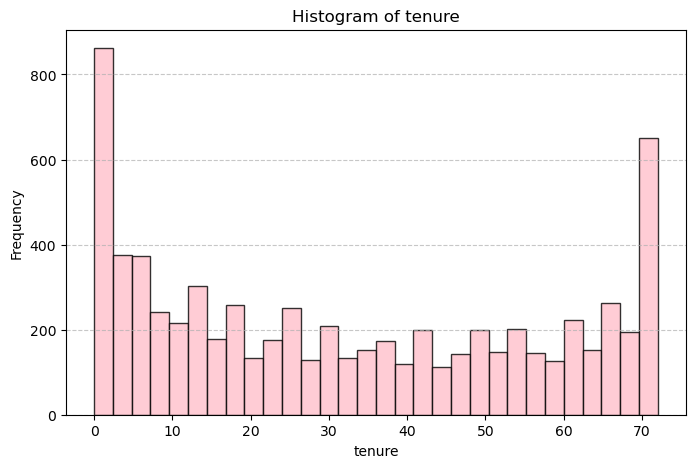

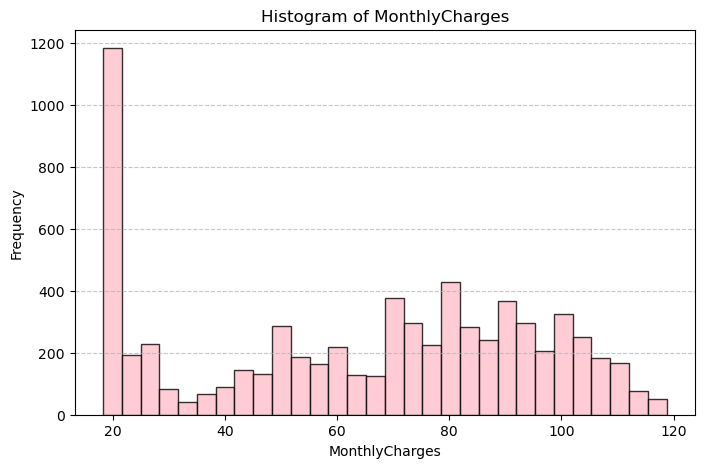

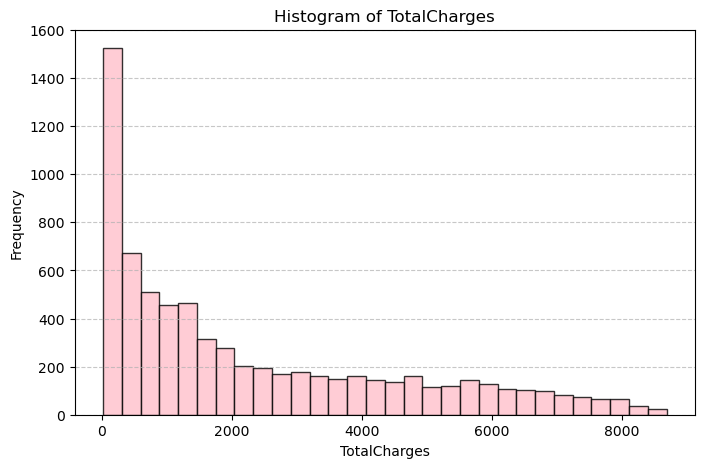

In [24]:
#plotting histograms 
for column in numerical_columns:
    plt.figure(figsize=(8,5))
    plt.hist(data [column], bins=30, color='pink', edgecolor='black',alpha=0.8)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--',alpha=0.7)
    plt.show()

In [25]:
#categorical columns 
categorical_columns = ['Contract','InternetService']

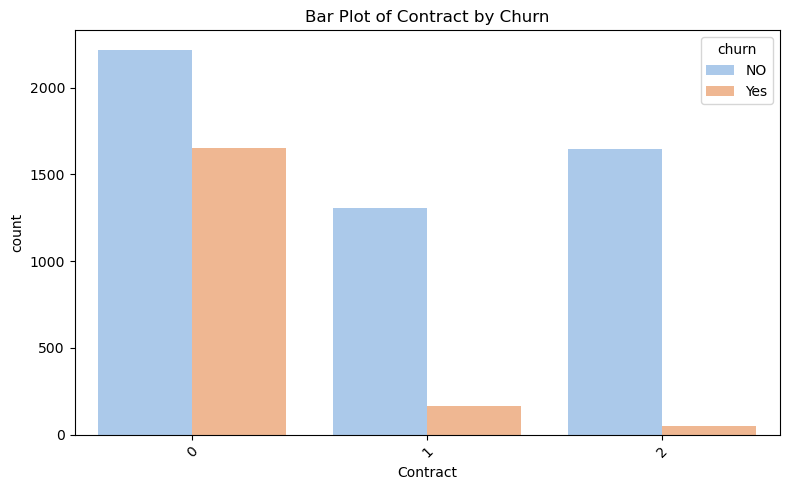

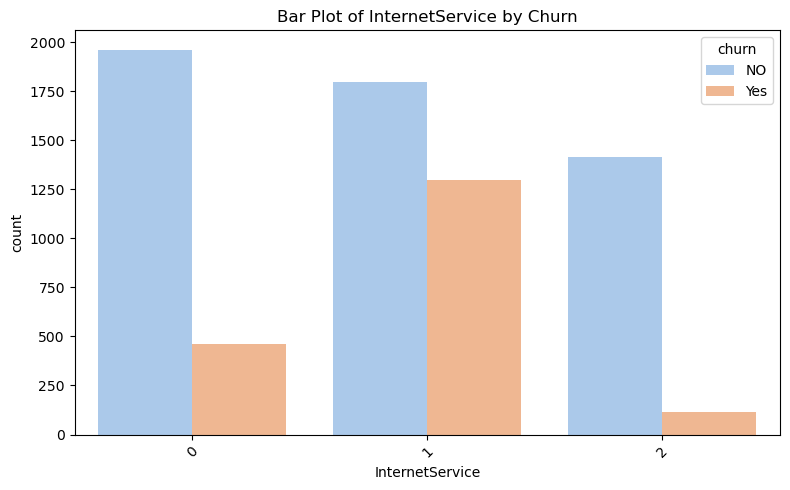

In [26]:
#plotting barplot
for column in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=data, x=column, hue='Churn', palette='pastel')
    plt.title(f'Bar Plot of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.legend(title='churn', labels=['NO','Yes'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [27]:
#numericals columns
numerical_columns =['PaperlessBilling','DeviceProtection','StreamingMovies']

In [28]:
#calculating correlation between numerical columns and churn
if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].apply(lambda x:1 if x == 'Yes' else 0)

In [29]:
# computing correlations
correlation = data[numerical_columns + ['Churn']].corr()

In [30]:
#presenting correlations of numerical veriables with churn
print("correlation of numerical variables with Churn:")
print(correlation['Churn'])

correlation of numerical variables with Churn:
PaperlessBilling    0.191825
DeviceProtection   -0.178134
StreamingMovies    -0.038492
Churn               1.000000
Name: Churn, dtype: float64


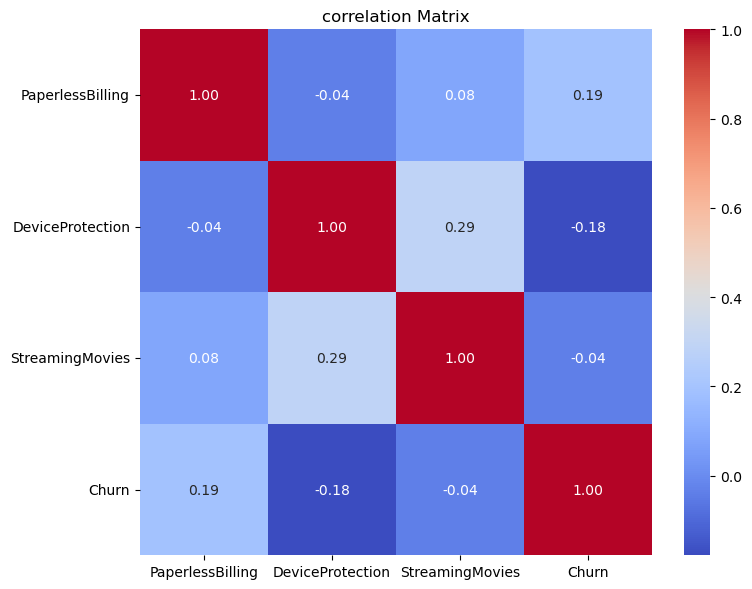

In [31]:
#plotting heatmap for correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('correlation Matrix')
plt.tight_layout()
plt.show()

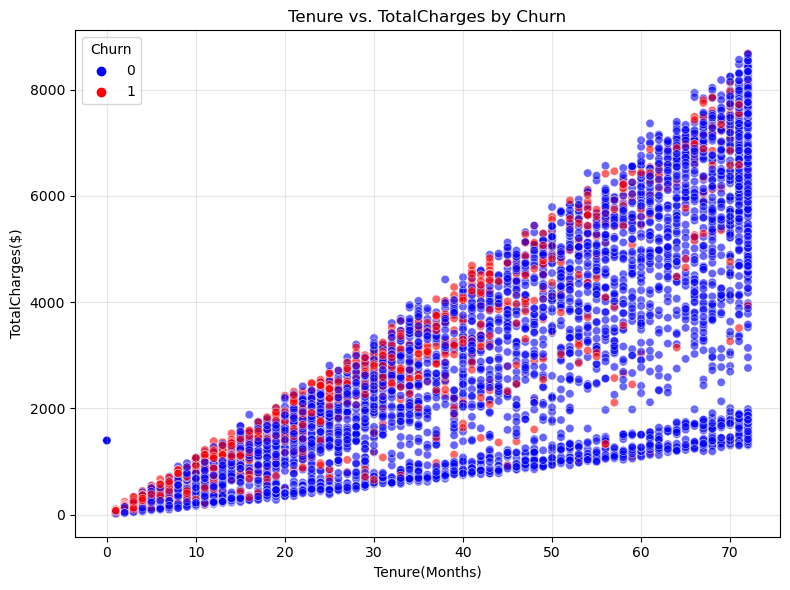

In [32]:
#plotting scatter plot 
plt.figure(figsize=(8,6))
sns.scatterplot(
data=data,
x='tenure',
y='TotalCharges',
hue='Churn',
palette={0: 'blue', 1: 'red'}, #0=no,1=yes
         alpha=0.6
         )
plt.title('Tenure vs. TotalCharges by Churn')
plt.xlabel('Tenure(Months)')
plt.ylabel('TotalCharges($)')
plt.legend(title='Churn')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
data_encoded = pd.get_dummies(data,drop_first=True)
#correlation matrix calculation
corr_matrix = data_encoded.corr()

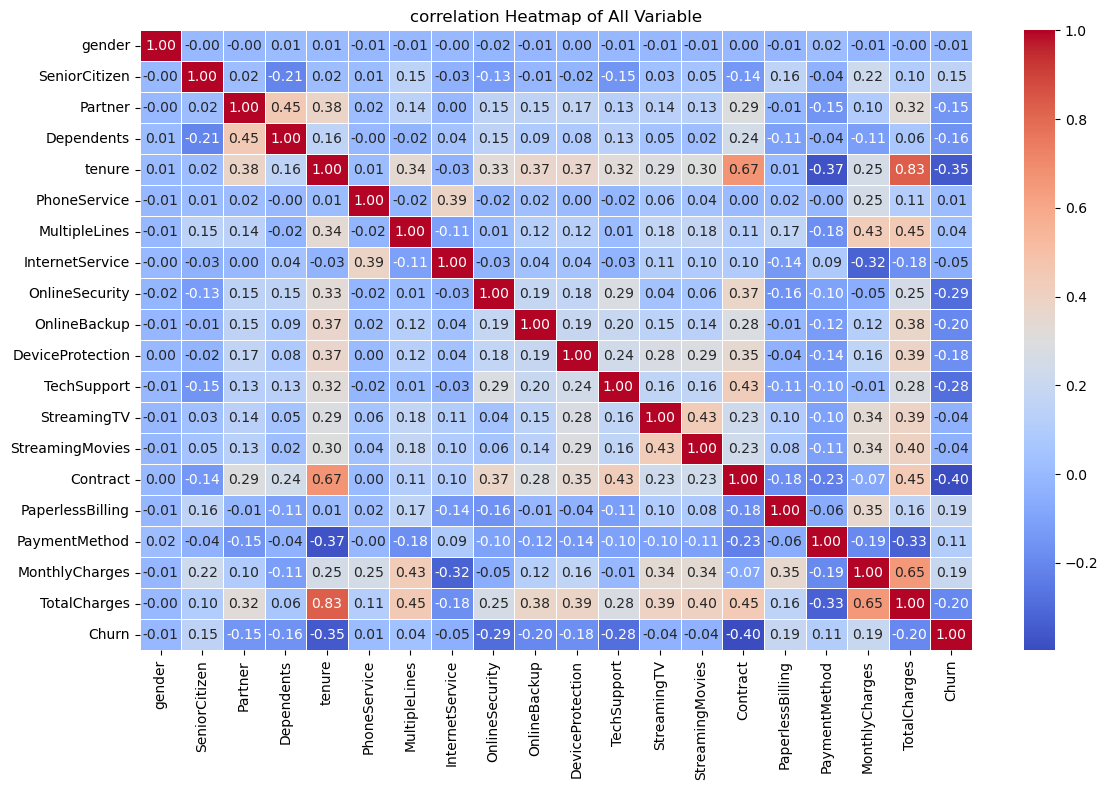

In [34]:
#plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('correlation Heatmap of All Variable')
plt.tight_layout()
plt.show()

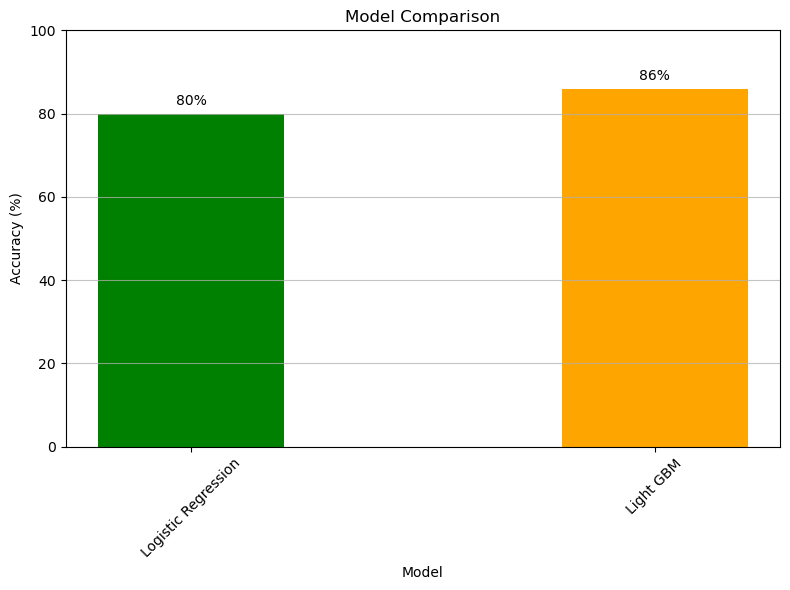

In [35]:
#plotting bargraph
models=['Logistic Regression','Light GBM']
accuracy=[80,86]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['green', 'orange'], width=0.4)

for i, v in enumerate(accuracy):
    plt.text(i, v + 2, str(v) + '%', ha='center', color='black')

plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()